In [7]:
import torch
import numpy as np
import scipy
import matplotlib.pyplot as plt
import cv2

In [2]:
#测试 exp(A) 能提升矩阵的秩
import scipy.special


a = np.random.randn(10,5)
b = np.random.randn(5,10)
A = np.matmul(a, b)
A_exp = np.exp(A)
print(np.linalg.matrix_rank(A), np.linalg.matrix_rank(A_exp),np.linalg.matrix_rank(scipy.special.softmax(A, -1)))

5 10 10


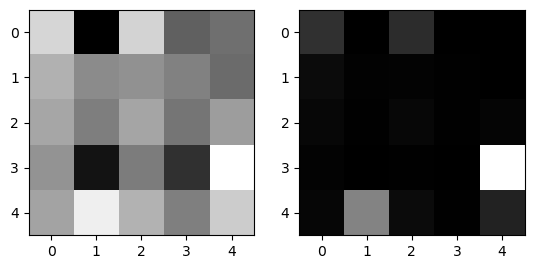

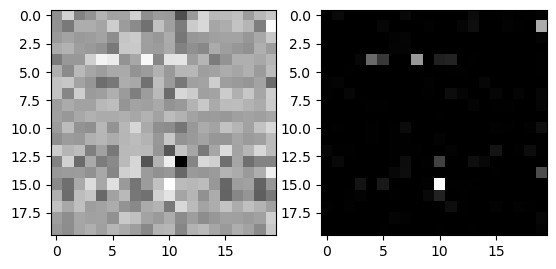

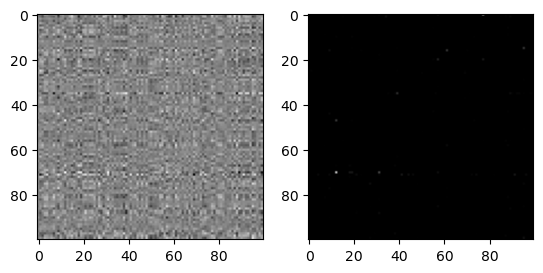

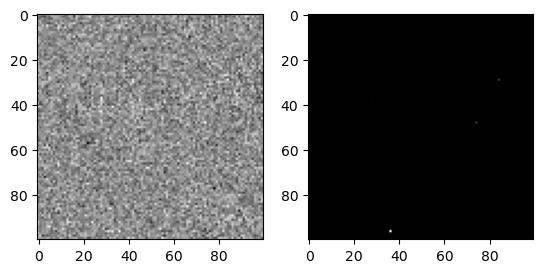

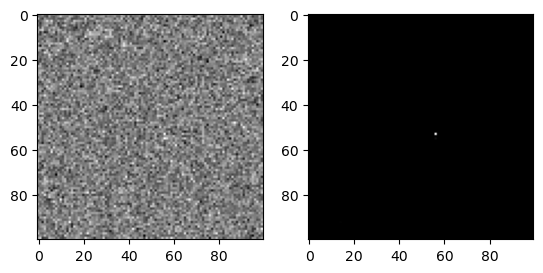

In [17]:
#测试 exp(A)能带来稀疏性
def test_matrix_sparse(m, n):
    a = np.random.randn(n,m)
    b = np.random.randn(m,n)
    epsilon = 1e-4
    A = np.matmul(a, b)
    A_exp = np.exp(A)
    A = A - np.min(A) + epsilon
    A = A / np.max(A)
    A_exp = A_exp - np.min(A_exp)
    A_exp = A_exp / np.max(A_exp)

    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(A, plt.cm.gray)
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(A_exp, plt.cm.gray)
    plt.show()

test_matrix_sparse(5,5)
test_matrix_sparse(5,20)
test_matrix_sparse(5,100)
test_matrix_sparse(100,100)
test_matrix_sparse(1000,100)

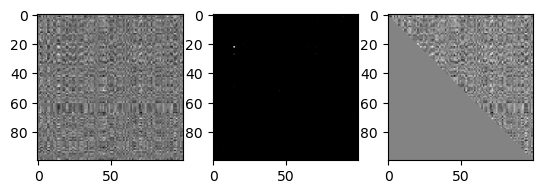

In [18]:
#测试三角矩阵能提升稀疏性
n = 100
m = 5
a = np.random.randn(n,m)
b = np.random.randn(m,n)
epsilon = 1e-4
A = np.matmul(a, b)

mask = np.triu(np.ones_like(A))
A_mask = A * mask
A_exp = np.exp(A)

A_mask = A_mask - np.min(A_mask) + epsilon
A_mask = A_mask / np.max(A_mask)
A = A - np.min(A) + epsilon
A = A / np.max(A)
A_exp = A_exp - np.min(A_exp) + epsilon
A_exp = A_exp / np.max(A_exp)

fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(A, plt.cm.gray)
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(A_exp, plt.cm.gray)
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(A_mask, plt.cm.gray)
plt.show()

In [9]:
image_cat = cv2.imread("./data/cat.jpg")
image_cat = cv2.cvtColor(image_cat, cv2.COLOR_BGR2RGB)
img = cv2.resize(image_cat, (100,100))
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
a = np.random.randn(100,100)
print(np.linalg.matrix_rank(a), np.linalg.matrix_rank(img_gray))

100 100


In [6]:
a = np.random.randn(100,100)
print(np.linalg.matrix_rank(a))

100
